In [50]:
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns  
import os 
from docx import Document 


In [51]:
folders=['output','charts','report'] 
for folder in folders:
    os.makedirs(folder,exist_ok=True)  


In [52]:
base_path=r"G:\python\Training Projects\P1" 
sales=pd.read_csv(f"{base_path}\\sales.csv",sep=';') 
customers=pd.read_csv(f"{base_path}\\customers.csv",sep=';') 
costs=pd.read_csv(f"{base_path}\\costs.csv",sep=';') 

In [53]:
df=sales.merge(customers,on='customer_id',how='left')
df=df.merge(costs,on='product_id',how='left')

In [54]:
def smart_clean():
    for col in df.select_dtypes(include='object'):
        df[col]=df[col].str.strip()
        df[col]=df[col].dropna(how='all',inplace=True)
    return df
df.columns=df.columns.str.title()

In [55]:
def auto_convert_numeric(df,thershold=0.70):
    for col in df.select_dtypes(include='object').columns:
        converted=pd.to_numeric(df[col],errors='coerce')
        numeric_ratio=converted.notna().mean()
        if numeric_ratio>=0.7:
            df[col]=converted
    return df

In [56]:
df

,Order_Id,Order_Date,Product_Id,Product_Name,Category,Quantity,Unit_Price,Customer_Id,Customer_Name,City,Registration_Date,Cost_Per_Unit
0,1001,03/01/2024,P01,Laptop A,Electronics,2,850,C01,Ahmed Ali,Cairo,01/10/2023,650
1,1002,03/01/2024,P03,Mouse X,Accessories,3,25,C02,Mona Hassan,Giza,12/11/2023,15
2,1003,05/01/2024,P02,Laptop B,Electronics,1,1100,C01,Ahmed Ali,Cairo,01/10/2023,900
3,1004,10/01/2024,P04,Keyboard K,Accessories,2,45,C03,Karim Samy,Cairo,20/12/2023,30
4,1005,01/02/2024,P01,Laptop A,Electronics,1,850,C04,Sara Youssef,Alex,15/01/2024,650


In [57]:
df['Revenue']=df['Quantity']*df['Unit_Price']
df['Total Cost']=df['Quantity']*df['Cost_Per_Unit']
df['Profit']=df['Revenue']-df['Total Cost']
df['Margin Profit']=(df['Profit']*100/df['Revenue']).round(0)
Max_City_Revenue=df.groupby('City')['Revenue'].sum().idxmax()
Max_Month_Revenue=df.groupby('Order_Date')['Revenue'].sum().idxmax()
Max_Category_Revenue=df.groupby('Category')['Revenue'].sum().idxmax()

In [94]:
Total_Revenue=df['Revenue'].sum()
Total_Orders=df['Order_Id'].nunique()
Total_Customers=df['Customer_Id'].nunique()
Average_Order_Value=Total_Revenue/Total_Orders

In [59]:
KPIs={'Revenue':df['Revenue'].sum(),'Profit':df['Total Cost'].sum(),'Profit':df['Profit'].sum(),\
  'Margin Profit': df['Margin Profit'].mean() ,'Max_City_Revenue':Max_City_Revenue,\
      'Max_Month_Revenue':Max_Month_Revenue,'Max_Category_Revenue'\
          :Max_Category_Revenue}

KPIs_results={'Revenue':df['Revenue'].sum(),'Total Cost':df['Total Cost'].sum(),'Profit':df['Profit'].sum(),\
  'Margin Profit': df['Margin Profit'].mean() ,'Max_City_Revenue':Max_City_Revenue,\
      'Max_Month_Revenue':Max_Month_Revenue,'Max_Category_Revenue'\
          :Max_Category_Revenue}

KPIs_df=pd.DataFrame(list(KPIs_results.items()),columns=['KPIs','Value'])


In [60]:
df.columns

Index(['Order_Id', 'Order_Date', 'Product_Id', 'Product_Name', 'Category',
       'Quantity', 'Unit_Price', 'Customer_Id', 'Customer_Name', 'City',
       'Registration_Date', 'Cost_Per_Unit', 'Revenue', 'Total Cost', 'Profit',
       'Margin Profit'],
      dtype='object')

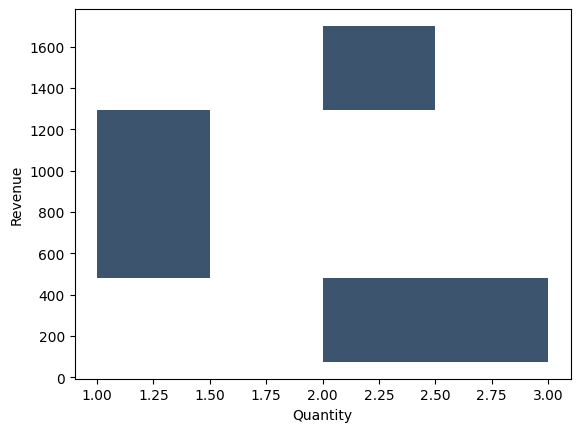

In [77]:
# Charts
mydata=df.groupby(['Quantity','Product_Name','Category'],as_index=False)\
    [['Revenue','Total Cost','Profit','Margin Profit']].sum()
    
Quantity_Revenue_Sum=sns.histplot(x='Quantity',y='Revenue',data=mydata)


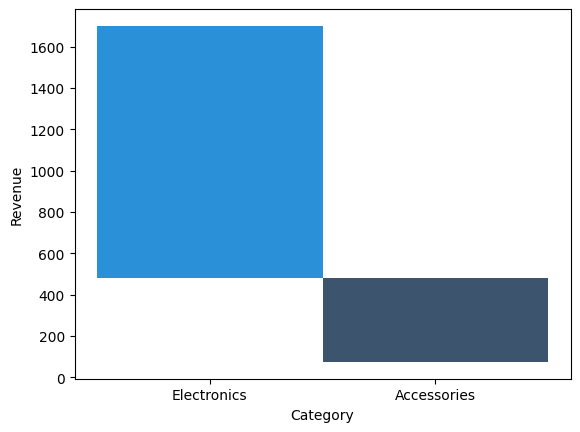

In [73]:
Category_Revenue_Sum=sns.histplot(x='Category',y='Revenue',data=mydata)

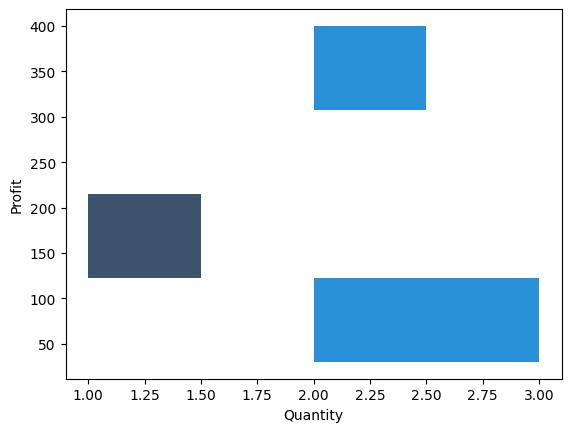

In [72]:
Quantity_Profit_Sum=sns.histplot(x='Quantity',y='Profit',data=mydata)

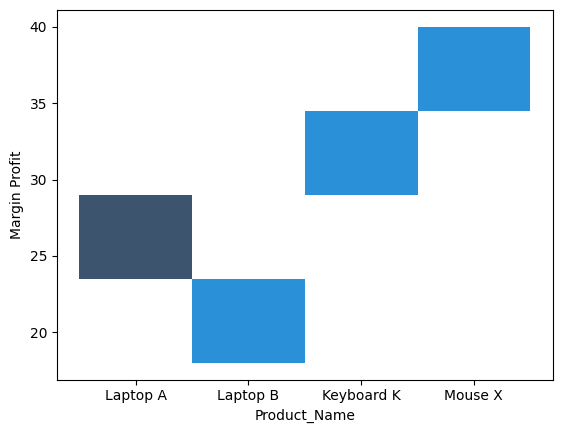

In [74]:
Product_Name_Margin=sns.histplot(x='Product_Name',y='Margin Profit',data=mydata)

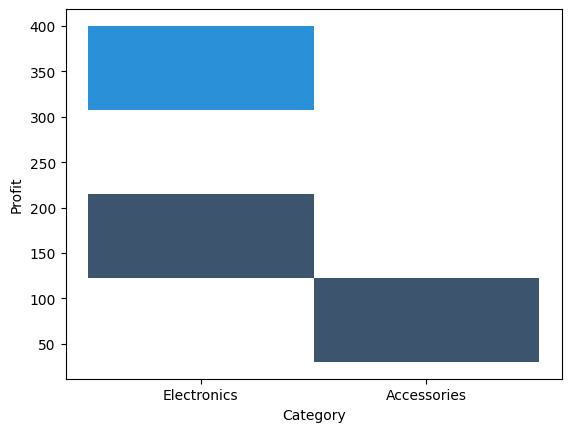

In [75]:
Category_Profit_Sum=sns.histplot(x='Category',y='Profit',data=mydata)

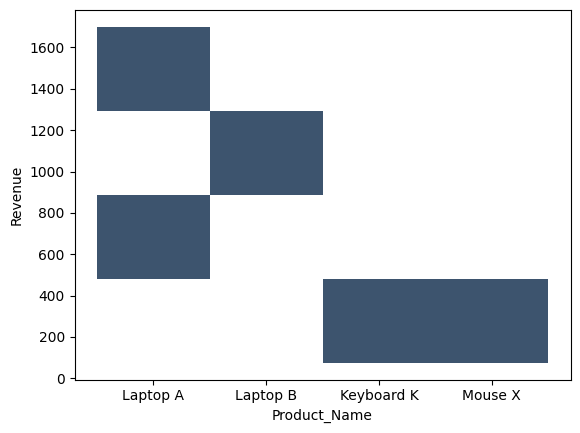

In [78]:
Product_Name_Revenue_Sum=sns.histplot(x='Product_Name',y='Revenue',data=mydata)

In [ ]:
# INSIGHTS
Top_Category=df.groupby('Category')['Revenue'].sum().idxmax()
Top_Month=df.groupby('Order_Date')['Revenue'].sum().idxmax()

Insights = [
    f"Highest revenue category is {Top_Category}.",
    f"Peak sales month is {Top_Month}.",
    "Revenue concentration indicates strong performance in specific product categories.",
    "Average order value suggests stable customer purchasing behavior.",
]


    


['Highest revenue category is Electronics.', 'Peak sales month is 03/01/2024.', 'Revenue concentration indicates strong performance in specific product categories.', 'Average order value suggests stable customer purchasing behavior.']


In [104]:
# REPORT (WORD)
doc=Document()
doc.add_heading("Sales Analysis Report",level=1)

doc.add_heading("Project Oveview",level=2)
doc.add_paragraph("This automated report analizes sales performance,\
customer behavior, and revenue trends using python automation ")

doc.add_heading("Key Performance Indicators(KPIs)",level=2)
doc.add_paragraph(f"Total Revenue : {Total_Revenue:,.2f}")
doc.add_paragraph(f"Total Orders : {Total_Orders}")
doc.add_paragraph(f"Average Order Value : {Average_Order_Value}")
doc.add_paragraph(f"Total_Customers : {Total_Customers:,.2f}")

doc.add_heading("Visual Analysis",level=2)
doc.add_picture("charts/Category_Profit_Sum.png")
doc.add_picture("charts/Category_Revenue_Sum.png")
doc.add_picture("charts/Product_Name_Margin.png")
doc.add_picture("charts/Product_Name_Revenue_Sum.png")
doc.add_picture("charts/Quantity_Profit_Sum.png")
doc.add_picture("charts/Quantity_Revenue_Sum.png")

doc.add_heading("Conclusion",level=2)
doc.add_paragraph(
    "The analysis highlights key revenue drivers and sales patterns. "
    "These insights can support data-driven business decisions." ) 

doc.save("report/Sales_Analysis_Report.docx")




In [102]:
# Done

In [103]:
print("Automation completed successfuly!")
print("Outputs saved in: output/charts/report")

Automation completed successfuly!
Outputs saved in: output/charts/report
